In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
#import seaborn as sns
#import pandas as pd
from local_lr import BCM
from local_lr import data_loader
import sklearn
% matplotlib inline

#import tensorflow as tf
import collections
np.random.seed(seed=8723)
# Two ways to load MNIST dataset
# Using sklean
# MNIST database contains a total of 70000 examples of handwritten digits of size 28*28 pixels, labeled 0 to 9

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'BCM'

In [4]:
data = np.load('/notebooks/mnist_data.npy')
labels = np.load('/notebooks/mnist_labels.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/notebooks/mnist_data.npy'

In [ ]:
# Plot a gallery of images
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of images"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

portion = 0.05
N = int(portion*data.shape[0])
shuffle_idx = np.random.permutation(data.shape[0])[:N]
data = data[shuffle_idx]
# shuffle_idx = np.random.permutation(data.shape[0])[:N]
labels = labels[shuffle_idx]

# demean
ave_total = data.mean(axis=0)
data -= ave_total 

# Perform zca whitening
ZCAMatrix = BCM.zca_whitening_matrix(data.T)
data_wt = np.dot(data,ZCAMatrix)


h = 14
w = 14
plt.imshow(ave_total.reshape(h,w),cmap=plt.cm.gray)
# Visualize the demeaned digits
plt_row = 3
plt_col = 7
data_view = []
titles_view = []
for i in range(plt_row*plt_col+1):
    data_view.append(data_wt[i,:].reshape(h,w))
    titles_view.append(labels[i])

plot_gallery(data_view, titles_view, h, w, n_row=plt_row, n_col=plt_col)


# To see what BCM learning rule is really doing, we will compare it with using PCA, ICA on MNIST

# See the downloaded MNIST data
#a = np.where(labels == 3,1,0)
#collections.Counter(a)y
# Take a small portion of the dyataset

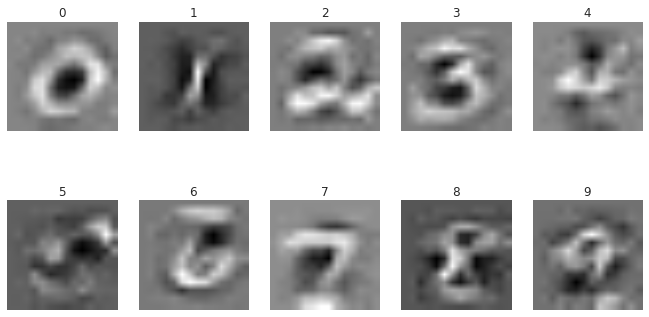

In [3]:
group_id = []
ave_digi = []
for i in range(10):
    group_id_tmp = labels == i
    group_id.append(group_id_tmp)
    ave_digi_tmp = data_wt[group_id_tmp,:].mean(axis=0)
    ave_digi.append(ave_digi_tmp.reshape(h,w))
    
# plot the average image of each digit
plt_row = 2
plt_col = 5

titles_digi= range(10)

plot_gallery(ave_digi, titles_digi, h, w, n_row=plt_row, n_col=plt_col)

In [ ]:
# Train BCM model with Mnist

ny = 2    # 2 output neurons
p = 2
tau = 100
batch = 1

nonlinear = 'Relu'
obj_type = 'QBCM'
n_epoch = 80
decay = 0.05
eta = 0.00000005

BCM_mnist = BCM.bcm_train(data_wt,eta = eta, n_epoch = n_epoch, batch = batch , ny = ny,tau = tau, thres = 0, p = p,random_state = None, shuffle = True, nonlinear = nonlinear, obj_type = obj_type,decay = decay)

In [6]:
h = 14
w = 14
BCMdigits = []
for i in range(ny):
    BCMdigits_tmp = BCM_mnist.w_[:,i];
    BCMdigits.append(BCMdigits_tmp.reshape(h,w))
    
BCMdigits_titles = ["BCMdigits %d" % i for i in range (ny)]
plot_gallery(BCMdigits,BCMdigits_titles,h,w,n_row= 1, n_col=2)

AttributeError: 'NoneType' object has no attribute 'w_'